# Libraries and function to show images
Import the libaries

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

The function to show image for the demo

In [3]:

# showing the demo images
def showImage(titles, images):
    fig=plt.figure()
    l = len(images)
    for i in range(l):
        fig.add_subplot(1, l, i+1)
        plt.imshow(images[i]/255.0, interpolation='nearest')
        plt.title(titles[i])
        plt.axis("off")

# Pick the random position and define patch Size
The random positon **P** is picked with the following parameters:
1. pValue = 32
2. Patch Size = 128

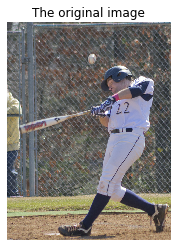

In [4]:
pValue = 32
patchSize = 128
img = cv2.imread('example.jpg', flags=cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

title = ["The original image"]
image = [img]
showImage(title, image)

img = np.array(img, np.float32)
height, width, _ = img.shape
x = np.random.randint(low=pValue, high= width - pValue - patchSize)
y = np.random.randint(low=pValue, high= height - pValue - patchSize)
pos = np.array([x, y], dtype=np.int)

# Get the 4-point P and the perturbed 4-point perturbedP

In [7]:
def randomCreatePatch(image, position):
        patchImage = image[position[1]: position[1] + patchSize, position[0]:position[0] + patchSize]
        H = np.random.randint(-pValue, pValue, size=(4, 2))
        p = np.array([
            position
            , [position[0] + patchSize, position[1]]
            , [position[0] + patchSize, position[1] + patchSize]
            , [position[0], position[1] + patchSize]
        ], dtype=np.float32)

        perturbedP = np.array(p + H, dtype=np.float32)
        H_AB = cv2.getPerspectiveTransform(p, perturbedP)
        H_BA = np.linalg.inv(H_AB)
        warpedImage = cv2.warpPerspective(image, H_BA, dsize=(image.shape[1], image.shape[0]))
        perturbedPatchImage = warpedImage[position[1]: position[1] + patchSize,
                              position[0]:position[0] + patchSize]
        return patchImage, perturbedPatchImage, H, H_AB, warpedImage, p, perturbedP
source, dst, H, H_AB, warpedImage, p, perturbedP = randomCreatePatch(img, pos)

# Show the results

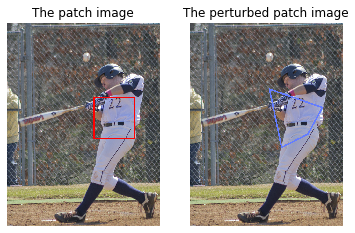

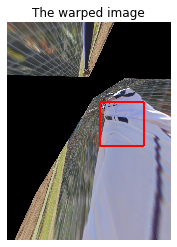

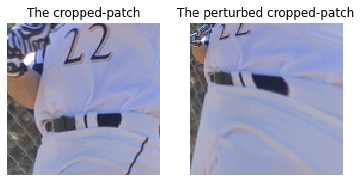

In [9]:

p = np.array([p], dtype=np.int32)
perturbedP = np.array([perturbedP], dtype=np.int32)
warpedImage = np.array(warpedImage, dtype=np.int32)
warpedImage = cv2.polylines(warpedImage, p, True, 255, 3, cv2.LINE_AA)

img = np.array(img, np.int32)
img0 = cv2.polylines(img.copy(), p , True, 255, 3, cv2.LINE_AA)
img1 = cv2.polylines(img.copy(), perturbedP , True, (100, 125, 255), 3, cv2.LINE_AA)


titles = ["The patch image", "The perturbed patch image"]
images = [img0, img1]
showImage(titles, images)

titles = ["The warped image"]
images = [warpedImage]
showImage(titles, images)

titles = ["The cropped-patch", "The perturbed cropped-patch"]
images = [source, dst]
showImage(titles, images)